# This script counts the number of A, C, G and T called at each marker.  The initial format has the samples as columns and rows as the markers.  Further down the script the dataframe is converted to columns are markers and rows are samples- CFH Nov 2016

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import os
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd

In [249]:
pwd()

u'C:\\Users\\Haineycf\\Documents\\python'

In [250]:
df = pd.read_table('Supplementary_Data_2.txt')
#df.insert(0, 'Position', df.Position(1))
df.head(n=5)

,LocusID,Reference,ASM1038v1,ASM1048v1,ASM1326v1,ASM1330v1,ASM14785v3,ASM1484v1,ASM16315v1,ASM16317v1,...,#G,#T,#Indel,#NXdegen,Chromosome,Position,InDupRegion,SampleConsensus,Pattern,Pattern#
0,NC_007779.1::58,G,G,G,G,G,G,G,G,C,...,461,0,0,0,NC_007779.1,58,No,Yes,'111111111112112111111111111111111111111111111...,3
1,NC_007779.1::61,T,T,T,T,T,T,T,T,T,...,0,701,0,0,NC_007779.1,61,No,Yes,'111111111111111111111111111111111111111111111...,5
2,NC_007779.1::64,T,T,T,T,T,T,T,T,C,...,0,460,0,0,NC_007779.1,64,No,Yes,'111111111112112111111111111111111111111111111...,6
3,NC_007779.1::68,A,A,A,A,A,A,A,A,A,...,0,9,0,0,NC_007779.1,68,No,Yes,'111111111111111111111111111111111111111111111...,7
4,NC_007779.1::79,T,T,T,T,T,T,T,T,T,...,5,697,0,0,NC_007779.1,79,No,Yes,'111111111111111111111111111111111111111111111...,8


In [268]:
position = df.Position
position.name = "Position"
position.head(n=5)


AttributeError: 'DataFrame' object has no attribute 'Position'

In [267]:
df.LocusID = position
df.head(n=5)

,LocusID,Reference,ASM1038v1,ASM1048v1,ASM1326v1,ASM1330v1,ASM14785v3,ASM1484v1,ASM16315v1,ASM16317v1,...,Esch_coli_KTE81_V1,Esch_coli_KTE84_V1,Esch_coli_KTE98_V1,Esch_coli_KTE9_V1,Esch_coli_M919_V2,Esch_coli_SWW33_V1,Esch_coli_TA124_V1,NCCP15647_1.0,NCCP15658v1.0,TW10509
0,58,G,G,G,G,G,G,G,G,C,...,G,G,G,G,G,G,G,G,C,C
1,61,T,T,T,T,T,T,T,T,T,...,T,T,T,T,T,T,T,T,T,T
2,64,T,T,T,T,T,T,T,T,C,...,T,T,T,T,T,T,T,T,C,C
3,68,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
4,79,T,T,T,T,T,T,T,T,T,...,T,T,T,T,T,T,T,T,T,T


In [253]:
#list(df.columns.values)

In [254]:
df.drop(df.columns[255:274], axis=1, inplace=True) # drops multiple columns, remember python starts at 0

In [255]:
#list(df.columns.values)

In [256]:
 #list(df.LocusID)

In [257]:
df2 =df.transpose()
df2.columns = df2.iloc[0]
df2 = df2[1:]

df2.head(n=6)

LocusID,58,61,64,68,79,84,86,95,96,147,...,4646212,4646214,4646224,4646232,4646236,4646237,4646248,4646257,4646283,4646302
Reference,G,T,T,A,T,A,C,G,T,C,...,C,A,A,T,G,C,A,G,A,C
ASM1038v1,G,T,T,A,T,A,C,G,T,C,...,C,A,A,T,G,C,A,G,A,C
ASM1048v1,G,T,T,A,T,A,C,T,C,C,...,C,A,A,T,G,C,A,G,A,C
ASM1326v1,G,T,T,A,T,A,C,G,T,C,...,C,A,A,T,G,C,A,G,A,C
ASM1330v1,G,T,T,A,T,A,C,G,T,C,...,C,A,A,T,G,C,A,G,A,C
ASM14785v3,G,T,T,A,T,A,C,G,T,C,...,C,G,A,T,G,C,A,G,A,C


In [258]:
A=df2[(df2[0:len(df2)]=="A")].count()
C=df2[(df2[0:len(df2)]=="C")].count()
G=df2[(df2[0:len(df2)]=="G")].count()
T=df2[(df2[0:len(df2)]=="T")].count()

In [262]:
df3=pd.concat([A,C,G,T],ignore_index=True, axis=1)
#df3.columns = df3.iloc[0]
df3.columns = ["#A", "#C", "#G", "#T"]
df3.head(n=6)

,#A,#C,#G,#T
58,0,43,211,0
61,1,0,0,253
64,0,44,0,210
68,252,0,0,2
79,0,0,2,252
84,253,1,0,0


In [263]:
del df3.index.name
df3.head(n=5)

AttributeError: name

In [269]:
def max_count(row):
   if row['#A'] > row['#C'] :
      if row['#A']>row['#G']:
        if row ['#A'] > row['#T']:
         return row['#A']
   if row['#C'] > row['#G']:
    if row['#C'] >row['#T']:
        return row['#C']
   if row ['#G'] > row['#T']:
        return row['#G']
   return row['#T']

In [270]:
df3['max_count'] = df3.apply (lambda row: max_count (row),axis=1)
df3.head(n=5)

,#A,#C,#G,#T,Position,max_count
58,0,43,211,0,1767.0,211.0
61,1,0,0,253,1797.0,253.0
64,0,44,0,210,1834.0,210.0
68,252,0,0,2,1854.0,252.0
79,0,0,2,252,1893.0,252.0


In [271]:
def min_count(row):
    if row['#T'] !=0:
        if row['#T'] != row['max_count']:
            if row['#T'] > row['#G'] or row['#G'] == row['max_count'] :
                if row['#T']>row['#C'] or row['#C'] == row['max_count'] :
                    if row ['#T'] > row['#A'] or row['#A'] == row['max_count']:
                        return row['#T']
    if row['#G'] !=0 : 
        if row['#G'] != row['max_count']:
            if row['#G'] > row['#C']or row['#C']== row['max_count']:
                if row['#G'] > row['#A']or row['#A'] == row['max_count']:
                    return row['#G']
    if row['#C'] !=0 :
        if row['#C'] != row['max_count']:
            if row ['#C'] > row['#A']or row['#A'] == row['max_count']:
                return row['#C']
    if row['#A'] !=0 :
        if row ['#A'] != row['max_count']:
            return row['#A']
    return 999

In [272]:
df3['min_count'] = df3.apply (lambda row: min_count (row),axis=1)
df3.head(n=5)

,#A,#C,#G,#T,Position,max_count,min_count
58,0,43,211,0,1767.0,211.0,43.0
61,1,0,0,253,1797.0,253.0,1.0
64,0,44,0,210,1834.0,210.0,44.0
68,252,0,0,2,1854.0,252.0,2.0
79,0,0,2,252,1893.0,252.0,2.0


In [283]:
df4 = df3.query('min_count > 10')
df4

,#A,#C,#G,#T,Position,max_count,min_count
58,0,43,211,0,1767.0,211.0,43.0
64,0,44,0,210,1834.0,210.0,44.0
393,0,0,164,90,4387.0,164.0,90.0
465,9,226,0,19,4813.0,226.0,19.0
474,0,205,0,49,4912.0,205.0,49.0
480,49,0,205,0,4963.0,205.0,49.0
559,0,127,0,127,6253.0,127.0,999.0
571,23,0,231,0,6331.0,231.0,23.0
588,155,0,99,0,6472.0,155.0,99.0
591,0,205,0,49,6544.0,205.0,49.0


In [274]:
df4 = df4[df4.min_count != 999]
df4 = df4.dropna()

In [275]:
df4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
#A,6163.0,4.857683e+01,7.423213e+01,0.0,0.0,0.0,67.0,243.0
#C,6163.0,7.895408e+01,9.349674e+01,0.0,0.0,19.0,183.0,243.0
#G,6163.0,6.869641e+01,9.087906e+01,0.0,0.0,0.0,162.0,243.0
#T,6163.0,5.777268e+01,7.731235e+01,0.0,0.0,18.0,89.0,243.0
Position,6163.0,2.501568e+06,1.462406e+06,1767.0,913077.5,2868529.0,3792679.0,4617645.0
max_count,6163.0,2.008817e+02,3.281151e+01,91.0,178.0,206.0,230.0,243.0
min_count,6163.0,5.166218e+01,3.142938e+01,11.0,24.0,47.0,73.0,126.0


In [280]:
df4.convert_objects(convert_numeric=True).dtypes

C:\Users\Haineycf\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


#A             int64
#C             int64
#G             int64
#T             int64
Position     float64
max_count    float64
min_count    float64
dtype: object

In [289]:
df4.to_csv('max_min_allele.csv')

In [281]:
def diversity(row):
   if row['#T'] !=0:
    if row['#T'] != row['max_count']:
     if row['#T'] > row['#G'] or row['#G'] == row['max_count'] :
        if row['#T']>row['#C'] or row['#C'] == row['max_count'] :
         if row ['#T'] > row['#A'] or row['#A'] == row['max_count']:
            return (row['#T'])/702
   if row['#G'] !=0:
    if row['#G'] != row['max_count']:
     if row['#G'] > row['#C']or row['#C']== row['max_count']:
        if row['#G'] > row['#A']or row['#A'] == row['max_count']:
         return (row['#G'])/702
   if row['#C'] !=0:
    if row['#C'] != row['max_count']:
     if row ['#C'] > row['#A']or row['#A'] == row['max_count']:
        return (row['#C'])/702
   if row['#A'] !=0 & row ['#A'] != row['max_count']:
        return (row['#A'])/702
   return 'NaN'

In [282]:
df4['diversity'] = df4.apply (lambda row: diversity (row),axis=1)
df4.head(n=5)

TypeError: ("unsupported operand type(s) for &: 'int' and 'float'", u'occurred at index 480')

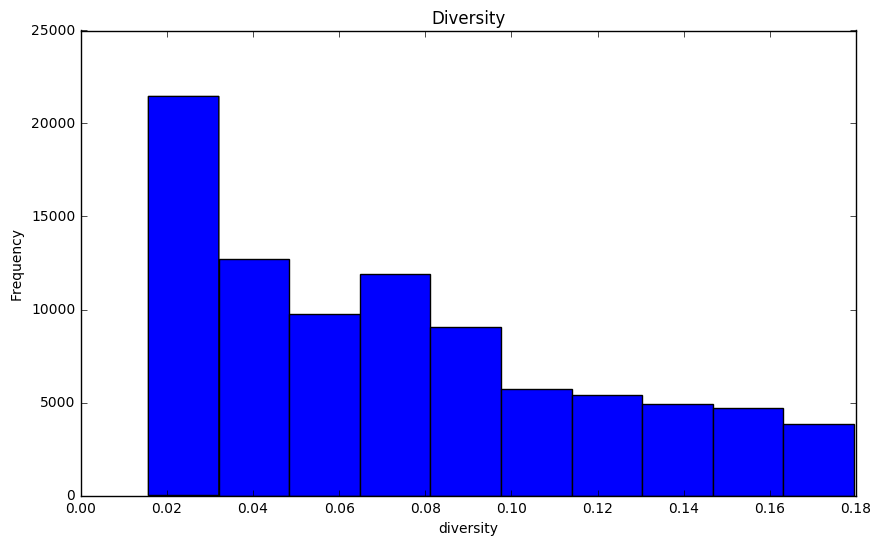

In [223]:
plt.hist(df4.diversity)
plt.title("Diversity")
plt.xlabel("diversity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# df.to_csv('example.csv')

In [224]:
div100 = pd.Series(df4.diversity).rolling(window=1000).mean()

In [228]:
list(df4.columns.values)

['#A', '#C', '#G', '#T', 'max_count', 'min_count', 'diversity']

In [286]:
physical = df.LocusID
physical.head(n=5)

0    58
1    61
2    64
3    68
4    79
Name: LocusID, dtype: int64

In [288]:
df5=pd.concat([physical, div100], axis=1)
df4.head(n=5)

,#A,#C,#G,#T,Position,max_count,min_count
58,0,43,211,0,1767.0,211.0,43.0
64,0,44,0,210,1834.0,210.0,44.0
393,0,0,164,90,4387.0,164.0,90.0
465,9,226,0,19,4813.0,226.0,19.0
474,0,205,0,49,4912.0,205.0,49.0


In [ ]:
df5=pd.concat([physical, div100], axis=1)
plt.scatter(df5.physical, df5.diversity)
plt.show()